Text(2, 1.5, 'Max error =1.1e-14')

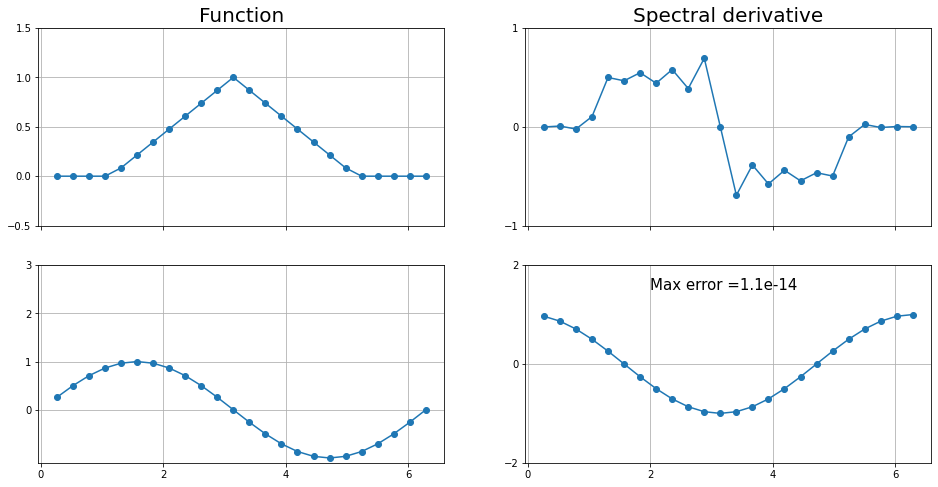

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import toeplitz as tp

N = 24
h = 2*np.pi / N

fig, ax = plt.subplots(2,2,sharex=True,sharey=False,figsize=(16,8))

x = np.matrix(range(1,N + 1)).T * h
column = 0.5*(-1)**np.arange(1,N,1)*(1/np.tan(np.arange(1,N,1)*h/2))
column = np.insert(column,0,0)
column = column

column_1 = [0]

for i in np.arange(N-1,1-1,-1): 
  column_1.append(column[i])

D = tp(column,column_1)

v = 1 - abs(x - np.pi)/2
v[v < 0] = 0

vprime = np.matrix(np.array(np.cos(x)) * np.array(v))

ax[0,0].plot(x,v,marker='o')

ax[0,0].set_title('Function',fontsize=20)
ax[0,0].set_xticks(np.arange(0,7,2))
ax[0,0].set_ylim(-0.5,1.5)
ax[0,0].set_yticks(np.arange(-0.5,1.6,0.5))
ax[0,0].grid()

ax[0,1].plot(x,np.dot(D,v),marker='o')

ax[0,1].set_title('Spectral derivative',fontsize=20)
ax[0,1].set_ylim(-1,1)
ax[0,1].set_yticks(np.arange(-1,1.1,1))
ax[0,1].grid()

v = np.array(np.sin(x))
vprime =  np.array(np.cos(x))

error_matrix = D @ v - vprime
error = error_matrix.sum(axis=1).max()

ax[1,0].plot(x,v,marker='o')

#ax[1,0].set_ylim(0,3)
ax[1,0].set_yticks(np.arange(0,3.1,1))
ax[1,0].grid()

ax[1,1].plot(x,D @ v,marker='o')

#ax[1,1].set_ylim(-1,1)
ax[1,1].set_yticks(np.arange(-2,2.1,2))
ax[1,1].grid()
ax[1,1].text(2,1.5,"Max error =" + str(round(error,16)),fontsize=15)

Text(2, 1.5, 'Max error =0.5199381000937647')

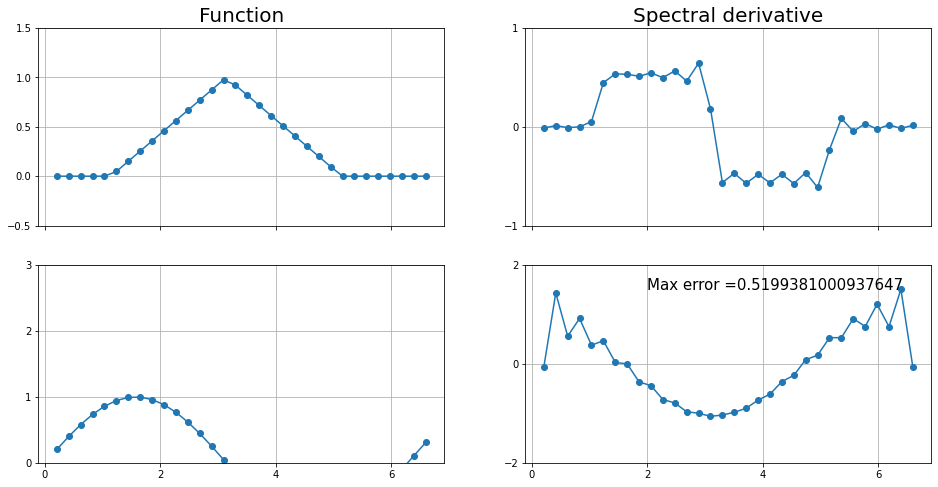

In [ ]:
plt.close()

fig, ax = plt.subplots(2,2,sharex=True,sharey=False,figsize=(16,8))

from scipy.fft import fft, ifft
N = 32
h = 2.1*np.pi / N

x = h * np.matrix(range(1,N+1)).T
v = 1 - abs(x - np.pi)/2
v[v < 0] = 0
v_hat = fft(v.T)

w_hat_1 = np.arange(0,N/2)
w_hat_2 = np.arange(-N/2+1,0)
w_hat_A = [] ; w_hat_A = np.append(w_hat_A,w_hat_1)
w_hat_A = np.append(w_hat_A,0) ; w_hat_A = np.append(w_hat_A,w_hat_2)
w_hat = (1j * w_hat_A * v_hat)

w = np.real(ifft(w_hat))

ax[0,0].plot(x,v,marker='o')

ax[0,0].set_title('Function',fontsize=20)
ax[0,0].set_xticks(np.arange(0,7,2))
ax[0,0].set_ylim(-0.5,1.5)
ax[0,0].set_yticks(np.arange(-0.5,1.6,0.5))
ax[0,0].grid()

ax[0,1].plot(x,w.T,marker='o')

ax[0,1].set_title('Spectral derivative',fontsize=20)
ax[0,1].set_ylim(-1,1)
ax[0,1].set_yticks(np.arange(-1,1.1,1))
ax[0,1].grid()

v = np.array(np.sin(x))
vprime = np.array(np.cos(x))
v_hat = fft(v.T)
w_hat = (1j * w_hat_A * v_hat)
w = np.real(ifft(w_hat))

error = (np.matrix(w).T - vprime).max()

ax[1,0].plot(x,v,marker='o')

ax[1,0].set_ylim(0,3)
ax[1,0].set_yticks(np.arange(0,3.1,1))
ax[1,0].grid()

ax[1,1].plot(x,w.T,marker='o')

ax[1,1].set_yticks(np.arange(-2,2.1,2))
ax[1,1].grid()
ax[1,1].text(2,1.5,"Max error =" + str(round(error,16)),fontsize=15)

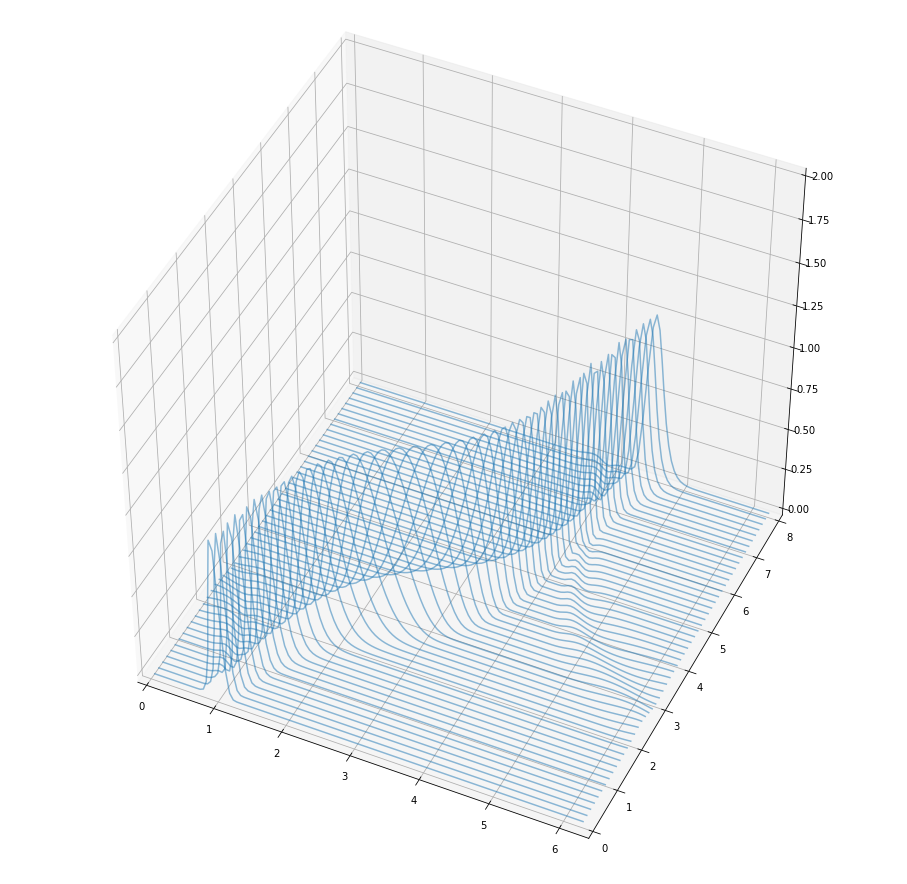

In [ ]:
plt.close()

from matplotlib.collections import LineCollection
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

N = 2**7 # 128=2**7 , 256=2**8
h = 2*np.pi/N
x = h*np.arange(1,N+1)
t = 0
dt = h/4

c = 0.2 + np.sin(x-1)**2
v = np.power(np.e,-100 * (x-1) ** 2)
vold = np.power(np.e,-100 * (x-0.2*dt-1) ** 2)

tmax = 8
tplot = 0.15
plotgap = round(tplot/dt)
dt = tplot/plotgap
nplots = round(tmax/tplot)
data = []
data.append(list(zip(x,v)))
tdata = [t]

w_hat_1 = np.arange(0,N/2)
w_hat_2 = np.arange(-N/2+1,0)
w_hat_A = [] ; w_hat_A = np.append(w_hat_A,w_hat_1)
w_hat_A = np.append(w_hat_A,0) ; w_hat_A = np.append(w_hat_A,w_hat_2)

for i in range(1,nplots+1):
  for n in range(1,plotgap+1):
    t = t + dt
    v_hat = fft(v)
    w_hat = (1j * w_hat_A * v_hat)
    w = np.real(ifft(w_hat))
    vnew = vold - 2 * dt * c * w
    vold = v
    v = vnew
  data.append(list(zip(x,v)))
  tdata = np.append(tdata,t)

fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')


line = LineCollection(data)
line.set_alpha(0.5)
ax.add_collection3d(line,zs=tdata,zdir='y')
ax.set_xlim3d(0,2*np.pi)
ax.set_ylim3d(0,8)
ax.set_zlim3d(0,2)


ax.view_init(45, -65)


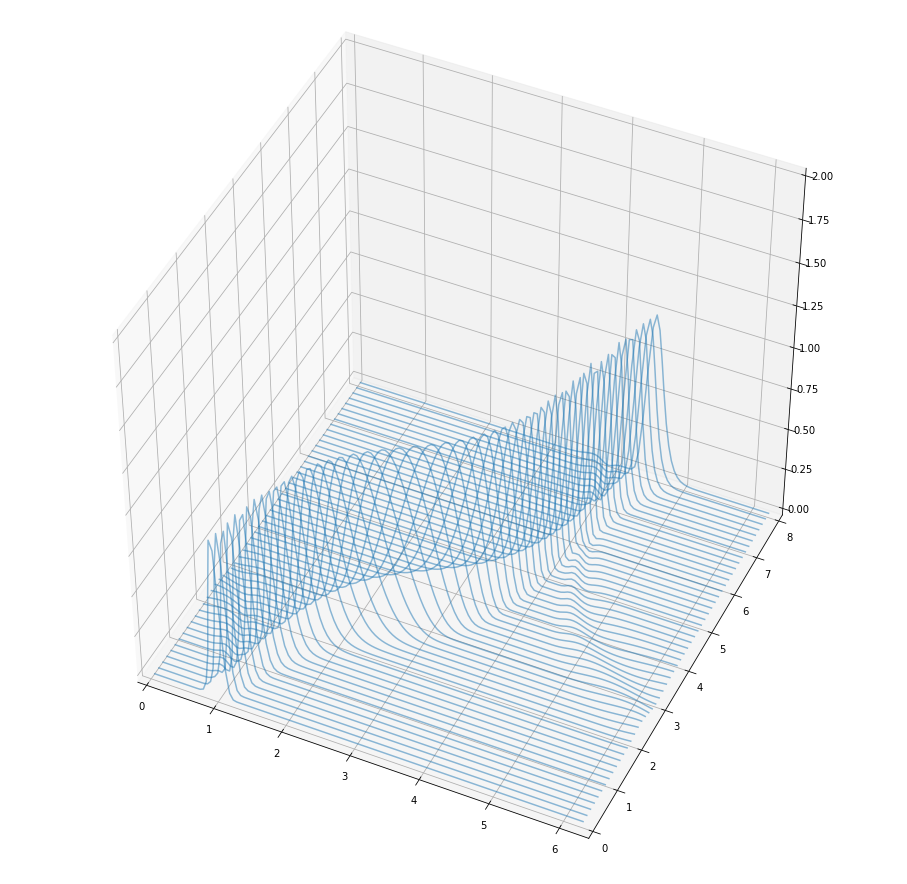

In [ ]:
plt.close()

x1 = h*np.arange(1,N+1)
t1 = 0

v1 = np.power(np.e,-100 * (x1-1) ** 2)
vold1 = np.power(np.e,-100 * (x1-0.2*dt-1) ** 2)

column2 = 0.5*(-1)**np.arange(1,N,1)*(1/np.tan(np.arange(1,N,1)*h/2))
#column2 = (-1)*(-1)**np.arange(1,N,1) / (2*np.sin(np.arange(1,N,1)*h/2))
value = 0
#value = ((-1)*(np.pi**2)/(3*h**2)) - 1/6
column2 = np.insert(column2,0,value)

column_3 = []

for i in np.arange(N-1,1-1,-1): 
  column_3.append(column2[i])

column_3 = np.insert(column_3,0,value)
D1 = tp(column2,column_3)

data1 = []
data1.append(list(zip(x1,v1)))
tdata1 = [t1]

for j in range(1,nplots+1):
  for m in range(1,plotgap+1):
    t1 = t1 + dt
    vnew1 = vold1 - 2 * dt * c * np.dot(D1,v1)
    vold1 = v1
    v1 = vnew1
  data1.append(list(zip(x1,v1)))
  tdata1 = np.append(tdata1,t1)


fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

line = LineCollection(data1)
line.set_alpha(0.5)
ax.add_collection3d(line,zs=tdata,zdir='y')
ax.set_xlim3d(0,2*np.pi)
ax.set_ylim3d(0,8)
ax.set_zlim3d(0,2)



ax.view_init(45, -65)

In [ ]:
plt.close()

from scipy.sparse import coo_matrix as coo

x2 = h*np.arange(1,N+1)

e = np.ones(N)

row = np.array(range(0,N))
col = np.array(range(1, N))
col = np.append(col,0)
data = 1/2 * e
D = coo((data, (row,col)), shape=(N,N)).toarray()

matrix = D
D2 = 1/h * (matrix - matrix.T)

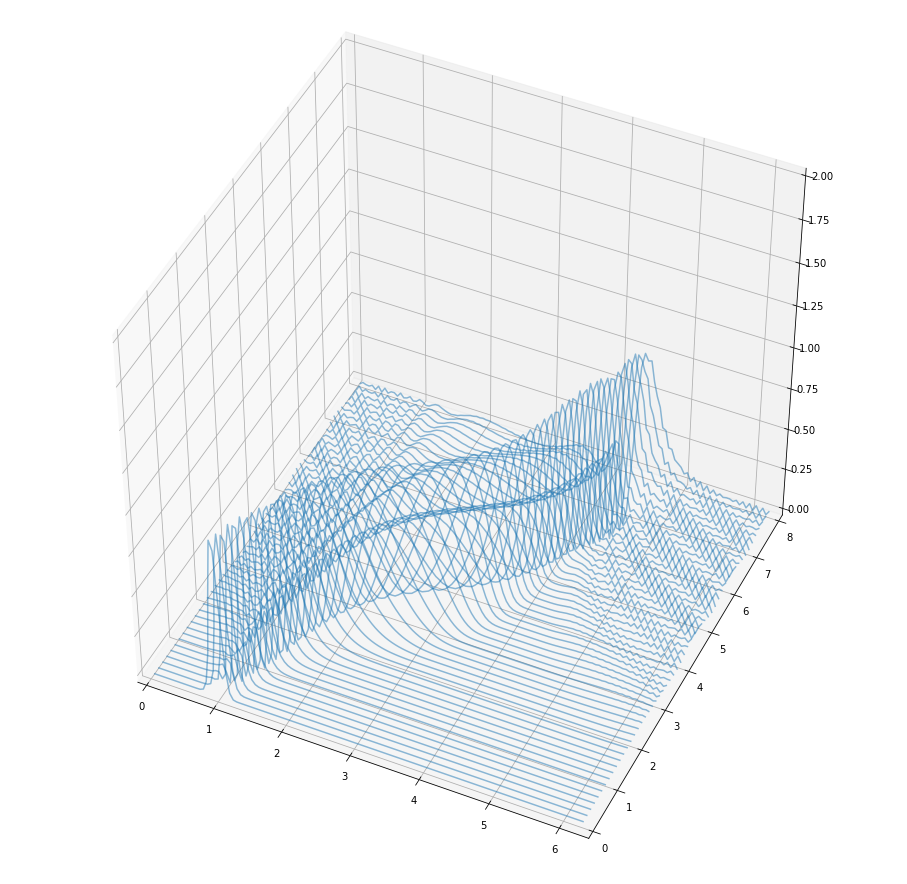

In [ ]:
t2 = 0

v2 = np.power(np.e,-100 * (x2-1) ** 2)
vold2 = np.power(np.e,-100 * (x2-0.2*dt-1) ** 2)

data2 = []
data2.append(list(zip(x2,v2)))
tdata2 = [t2]

for k in range(1,nplots+1):
  for l in range(1,plotgap+1):
    t2 = t2 + dt
    vnew2 = vold2 - 2 * dt * c * np.dot(D2,v2)
    vold2 = v2; v2 = vnew2
  data2.append(list(zip(x2,v2)))
  tdata2 = np.append(tdata2,t2)


fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

line = LineCollection(data2)
line.set_alpha(0.5)
ax.add_collection3d(line,zs=tdata,zdir='y')
ax.set_xlim3d(0,2*np.pi)
ax.set_ylim3d(0,8)
ax.set_zlim3d(0,2)


ax.view_init(45, -65)